# Simple Classification

This is a simple exercise on neural network for classification questions, which is the most important task in machine learning.
So, in this exercise we want you to classify the 2-dim data based on neural network method (The data is low dim so the model is not deep) and plot the decision boundary similar to SVM above.

The code below is the loading part of the data and the model definition. Please complete the training part and the decision boundary plotting part. You can refer to the SVM exercise for the plotting part.

c:\Users\HUAWEI\.conda\envs\dl\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\HUAWEI\.conda\envs\dl\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\HUAWEI\.conda\envs\dl\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


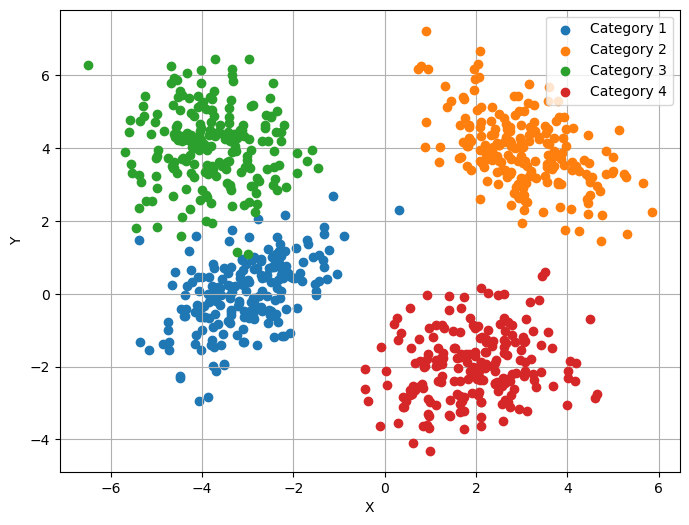

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


def generate_normal_data(mean, cov, num_samples):
    return np.random.multivariate_normal(mean, cov, num_samples)


categories = [
    {
        "mean": [-3, 0],
        "cov": [[1, 0.5], [0.5, 1]],
        "num_samples": 200,
        "label": "Category 1",
    },
    {
        "mean": [3, 4],
        "cov": [[1, -0.5], [-0.5, 1]],
        "num_samples": 200,
        "label": "Category 2",
    },
    {
        "mean": [-4, 4],
        "cov": [[1, 0], [0, 1]],
        "num_samples": 200,
        "label": "Category 3",
    },
    {
        "mean": [2, -2],
        "cov": [[1, 0.3], [0.3, 1]],
        "num_samples": 200,
        "label": "Category 4",
    },
]

data = []
for category in categories:
    mean = category["mean"]
    cov = category["cov"]
    num_samples = category["num_samples"]
    label = category["label"]
    samples = generate_normal_data(mean, cov, num_samples)
    data.append((samples, label))

plt.figure(figsize=(8, 6))

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True, zorder=0)

for idx, (samples, label) in enumerate(data, 1):
    plt.scatter(samples[:, 0], samples[:, 1], label=label, zorder=idx)

plt.legend(loc="upper right")


plt.show()

In [ ]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import SGD

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Prepare features and labels
features, labels = [], []
for samples, label in data:
    features.append(samples)
    labels.extend([label] * samples.shape[0])

features = np.vstack(features)
labels = le.fit_transform(np.vstack(labels))

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Create the Tensor Datasets
train_dataset = TensorDataset(
    torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
)
test_dataset = TensorDataset(
    torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)
)

c:\Users\HUAWEI\.conda\envs\dl\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.990625
Testing Accuracy: 1.0


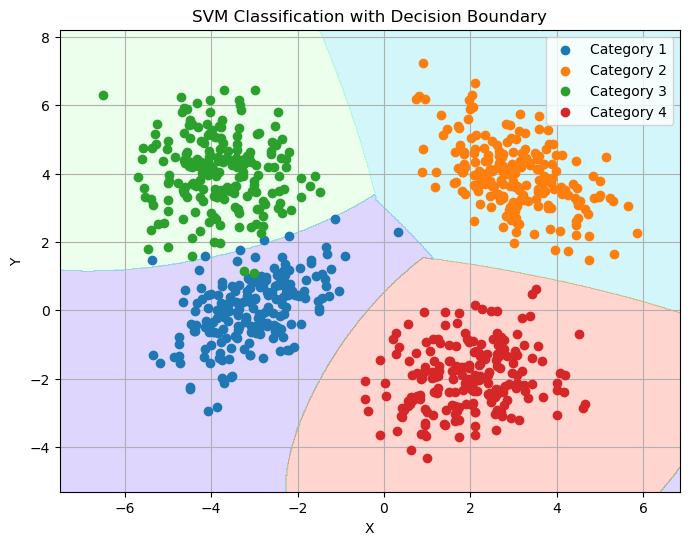

In [3]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plotting decision boundaries
plt.figure(figsize=(8, 6))
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True, zorder=0)

# Plot original data points
for samples, label in data:
    plt.scatter(samples[:, 0], samples[:, 1], label=label, zorder=5)

# Plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, zorder=1, cmap="rainbow")

plt.legend(loc="upper right")
plt.title("SVM Classification with Decision Boundary")
plt.show()

In [33]:
class LinearNetwork(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int) -> None:
        super(LinearNetwork, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.linear1(x)
        x = self.activation(x)
        return self.linear2(x)


# Instantiate the model
model = LinearNetwork(input_dim=2, hidden_dim=32, output_dim=len(categories))
model

LinearNetwork(
  (linear1): Linear(in_features=2, out_features=32, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=32, out_features=4, bias=True)
)

In [ ]:
# Now please training the neural network model and plot the decision boundary similar to SVM above.